### Offensive Language Identification Dataset - OLID

In [2]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [39]:
import numpy as np
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
vectorizer = TfidfVectorizer()
le = LabelEncoder()

**Let's put your student id as a variable, that you will use different places**

In [4]:
student_id = 2201277

Let's set `seed` for all libraries like `torch`, `numpy` etc as my student id

In [5]:
#numpy seed
np.random.seed(student_id)

In [6]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = os.path.join('/content/gdrive/MyDrive/CE807_7_SP/assignment2',str(student_id)) # Make sure to update with your student_id and student_id is an integer
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

List files:  ['models', 'test.csv', 'valid.csv', 'train.csv']


In [7]:
train_file = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv')
print('Train file: ', train_file)
valid_file = os.path.join(GOOGLE_DRIVE_PATH, 'valid.csv')
print('Valid file: ', valid_file)
test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
print('test file: ', test_file)

Train file:  /content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/train.csv
Valid file:  /content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/valid.csv
test file:  /content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/test.csv


Let's see train, valid, test file

In [8]:
train_df = pd.read_csv(train_file)
print(train_df.head(5))

      id                                              tweet label
0  42884  @USER I’m done with you as well. An INTENTIONA...   NOT
1  92152  I now have over 6k followers.  Only 94k to go ...   NOT
2  65475  @USER Tom was bought! He is more interested in...   NOT
3  22144  @USER @USER Even her brother thinks she is a m...   OFF
4  81048  @USER @USER @USER @USER @USER I can understand...   OFF


In [9]:
print(train_df.info())
print(train_df["label"].unique())
print(train_df["label"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12313 entries, 0 to 12312
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      12313 non-null  int64 
 1   tweet   12313 non-null  object
 2   label   12313 non-null  object
dtypes: int64(1), object(2)
memory usage: 288.7+ KB
None
['NOT' 'OFF']
NOT    8221
OFF    4092
Name: label, dtype: int64


In [10]:
print(train_df.tweet[0])

@USER I’m done with you as well. An INTENTIONAL 11th hour attack completely based on hearsay and you want an investigation? What do you think they’ll find other than he said she said. Feinstein admitted she sat on this and here you are ready to lockstep with the swamp.


In [11]:
valid_df = pd.read_csv(valid_file)
valid_df.head(5)

,id,tweet,label
0,12476,@USER @USER @USER Trump is declassifying infor...,NOT
1,23242,@USER Ha even with them trying to rig the syst...,NOT
2,97885,@USER @USER @USER Man you really thought this ...,NOT
3,43414,@USER Ms. Clinton - you are a class act. My re...,OFF
4,81403,@USER It’s still here at 753. If someone did t...,NOT


In [119]:
print(valid_df.info())
print(valid_df["label"].unique())
print(valid_df["label"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      927 non-null    int64 
 1   tweet   927 non-null    object
 2   label   927 non-null    object
dtypes: int64(1), object(2)
memory usage: 21.9+ KB
None
['NOT' 'OFF']
NOT    619
OFF    308
Name: label, dtype: int64


In [12]:
test_df = pd.read_csv(test_file)
test_df.head(5)

,id,tweet,label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF


In [120]:
print(test_df.info())
print(test_df["label"].unique())
print(test_df["label"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      860 non-null    int64 
 1   tweet   860 non-null    object
 2   label   860 non-null    object
dtypes: int64(1), object(2)
memory usage: 20.3+ KB
None
['OFF' 'NOT']
NOT    620
OFF    240
Name: label, dtype: int64


#Data pre processing

In [13]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    """
    A function that preprocesses text data by removing stopwords, punctuation, and performing lemmatization.

    Args:
    text: The text data to be preprocessed.

    Returns:
    The preprocessed text data.
    """
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]

    # Lemmatize the text
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the tokens back into a string
    text = ' '.join(tokens)

    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [30]:
# Apply the preprocess_text function to the 'tweet' column
#train_df['tweet'] = train_df['tweet'].apply(preprocess_text)

In [35]:
# Print the preprocessed text
#print(train_df.head(5))

      id                                              tweet label
0  42884  user ’ done well intentional 11th hour attack ...   NOT
1  92152    6k follower 94k go get goal trumptrain maga kag   NOT
2  65475         user tom bought interested tom constituent   NOT
3  22144           user user even brother think monster url   OFF
4  81048  user user user user user understand ’ someone ...   OFF


In [ ]:
"""
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Creating a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fitting and transforming the vectorizer on the preprocessed text data
X_train = vectorizer.fit_transform(train_df['tweet'])

# Encoding the label data
le = LabelEncoder()
y_train = le.fit_transform(train_df['label'])


# Preprocessing the text data in the validation data, loaded earlier
valid_df['tweet'] = valid_df['tweet'].apply(preprocess_text)

# Transforming the preprocessed text data using the fitted vectorizer
X_valid = vectorizer.transform(valid_df['tweet'])

# Encoding the label data in the validation data
y_valid = le.transform(valid_df['label'])
"""

In [ ]:
"""
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create a logistic regression object
lr = LogisticRegression()

# Fit the logistic regression model on the training data
lr.fit(X_train, y_train)

# Predict the labels of the validation data using the trained model
y_pred = lr.predict(X_valid)

# Evaluate the model's performance on the validation data
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print("confusion matrix \n", cm)

# Generate a classification report
cr = classification_report(y_valid, y_pred)
print(cr)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
"""

improve the performance of the logistic regression model by tuning its hyperparameters. The two main hyperparameters of logistic regression are the regularization parameter C and the penalty function penalty.

In [88]:
"""
from sklearn.model_selection import GridSearchCV

# Create a logistic regression object
lr = LogisticRegression()

# Define a grid of hyperparameters to search over
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Create a grid search object
grid_search = GridSearchCV(lr, param_grid, cv=5)

# Fit the grid search object on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Predict the labels of the validation data using the best model
y_pred = grid_search.best_estimator_.predict(X_valid)

# Evaluate the model's performance on the validation data
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
cm = confusion_matrix(y_valid, y_pred)

# Generate a classification report
cr = classification_report(y_valid, y_pred)
print(cr)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
"""

'\nfrom sklearn.model_selection import GridSearchCV\n\n# Create a logistic regression object\nlr = LogisticRegression()\n\n# Define a grid of hyperparameters to search over\nparam_grid = {\'C\': [0.1, 1, 10], \'penalty\': [\'l1\', \'l2\']}\n\n# Create a grid search object\ngrid_search = GridSearchCV(lr, param_grid, cv=5)\n\n# Fit the grid search object on the training data\ngrid_search.fit(X_train, y_train)\n\n# Print the best hyperparameters and the corresponding accuracy score\nprint("Best Hyperparameters:", grid_search.best_params_)\nprint("Best Accuracy Score:", grid_search.best_score_)\n\n# Predict the labels of the validation data using the best model\ny_pred = grid_search.best_estimator_.predict(X_valid)\n\n# Evaluate the model\'s performance on the validation data\naccuracy = accuracy_score(y_valid, y_pred)\nprint("Accuracy:", accuracy)\n\n# Generate a confusion matrix\ncm = confusion_matrix(y_valid, y_pred)\n\n# Generate a classification report\ncr = classification_report(y_va

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

def compute_performance(y_true, y_pred):

    # Calculate the F1-score
    f1 = f1_score(y_true, y_pred, average='macro')

    # Calculate other performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')

    # Print the performance metrics
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("Precision:", precision)
    print("F1 Score:", f1)

    # Generate a confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix of Random forest Classifier")
    plt.show()

    return f1

#train method 1

In [115]:
import pickle
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def train_method1(train_file, val_file, model_dir):

    # Preprocess the text data
    train_df['tweet'] = train_df['tweet'].apply(preprocess_text)

    # Create a TfidfVectorizer object
    vectorizer = TfidfVectorizer()
    
    # Fit and transform the vectorizer on the preprocessed text data
    X_train = vectorizer.fit_transform(train_df['tweet'])

    # Encode the label data
    le = LabelEncoder()
    y_train = le.fit_transform(train_df['label'])

    # Create a logistic regression object
    lr = LogisticRegression()
    rf = RandomForestClassifier()

    # Train the logistic regression model on the training data
    #lr.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    # Load the validation data
    valid_df = pd.read_csv(val_file)

    # Preprocess the text data in the validation data
    valid_df['tweet'] = valid_df['tweet'].apply(preprocess_text)

    # Transform the preprocessed text data using the fitted vectorizer
    X_valid = vectorizer.transform(valid_df['tweet'])

    # Encode the label data in the validation data
    y_valid = le.transform(valid_df['label'])

    # Predict the labels of the validation data using the trained model
    y_pred = rf.predict(X_valid)

    # Compute the performance of the model using the compute_performance function
    f1 = compute_performance(y_valid, y_pred)

    # Save the fitted vectorizer and trained logistic regression model in the model directory
    with open(os.path.join(model_dir, 'vectorizer.pkl'), 'wb') as f:
        pickle.dump(vectorizer, f)

    with open(os.path.join(model_dir, 'model.pkl'), 'wb') as f:
        pickle.dump(rf, f)

    return f1

In [116]:
MODEL_1_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '1') # Model 1 directory
print('Model 1 directory: ', MODEL_1_DIRECTORY)

Model 1 directory:  /content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1


### training with original dataset

Accuracy: 0.7680690399137001
Recall: 0.681152046660932
Precision: 0.7721162937283328
F1 Score: 0.6957291706423419


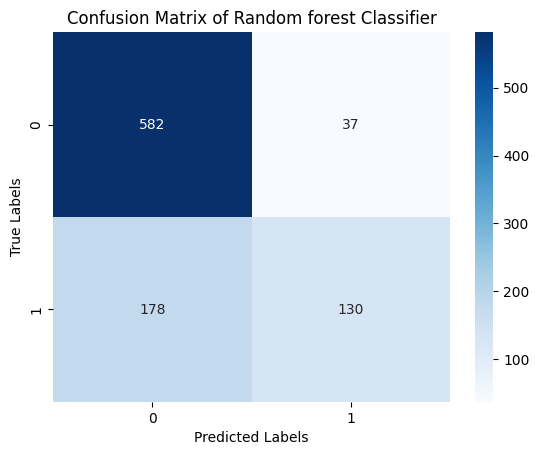

0.6957291706423419

In [117]:
train_method1(train_file, valid_file, MODEL_1_DIRECTORY)

#### Trying to improve the model with GridSearchCV

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def train_method1_grid_search(train_file, val_file, model_dir):

    # Preprocess the text data
    train_df['tweet'] = train_df['tweet'].apply(preprocess_text)

    # Create a TfidfVectorizer object
    vectorizer = TfidfVectorizer()

    # Fit and transform the vectorizer on the preprocessed text data
    X_train = vectorizer.fit_transform(train_df['tweet'])

    # Encode the label data
    le = LabelEncoder()
    y_train = le.fit_transform(train_df['label'])

    # Define a parameter grid for hyperparameter tuning
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 4],
        'min_samples_leaf': [1, 2]
    }

    # Create a random forest classifier object
    rf = RandomForestClassifier()

    # Perform hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring='f1_macro')
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters found during hyperparameter tuning
    print('Best hyperparameters:', grid_search.best_params_)

    # Train the random forest classifier on the training data using the best hyperparameters
    rf_best = RandomForestClassifier(**grid_search.best_params_)
    rf_best.fit(X_train, y_train)

    # Load the validation data
    valid_df = pd.read_csv(val_file)

    # Preprocess the text data in the validation data
    valid_df['tweet'] = valid_df['tweet'].apply(preprocess_text)

    # Transform the preprocessed text data using the fitted vectorizer
    X_valid = vectorizer.transform(valid_df['tweet'])

    # Encode the label data in the validation data
    y_valid = le.transform(valid_df['label'])

    # Predict the labels of the validation data using the trained model
    y_pred = rf_best.predict(X_valid)

    # Compute the performance of the model using the compute_performance function
    f1 = compute_performance(y_valid, y_pred)

    # Save the fitted vectorizer and trained random forest classifier model in the model directory
    with open(os.path.join(model_dir, 'vectorizer_gs.pkl'), 'wb') as f:
        pickle.dump(vectorizer, f)

    with open(os.path.join(model_dir, 'model_gs.pkl'), 'wb') as f:
        pickle.dump(rf_best, f)

    return f1

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}
Accuracy: 0.7659115426105717
Recall: 0.6893240039443593
Precision: 0.7547966285948242
F1 Score: 0.7032409681745156


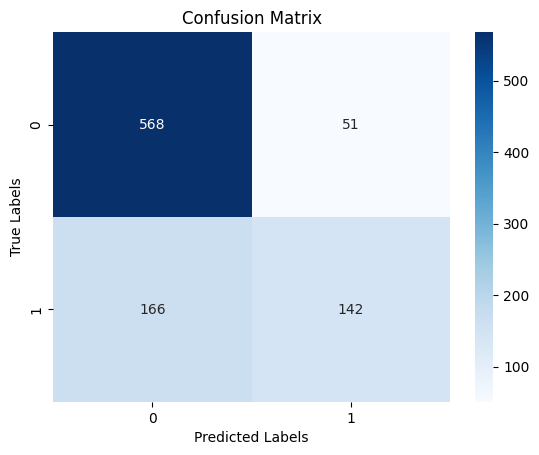

0.7032409681745156

In [25]:
train_method1_grid_search(train_file, valid_file, MODEL_1_DIRECTORY)

### Spliting original dataset

In [26]:
MODEL_1_25_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'25') # Model 1 trained using 25% of train data directory
print('Model 1 directory with 25% data: ', MODEL_1_25_DIRECTORY)

Model 1 directory with 25% data:  /content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1/25


In [33]:
from sklearn.model_selection import train_test_split

# Loading the original dataset
train_file_02 = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv')
train_df_02 = pd.read_csv(train_file)

# Get the labels and features
X = train_df_02['tweet']
y = train_df_02['label']

# Split the data into train and test sets with a 75:25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=student_id)

# Split the train data into 4 subsets
X_train_temp, X_train_100, y_train_temp, y_train_100 = train_test_split(X_train, y_train, test_size=0.75, stratify=y_train, random_state=student_id)
X_train_25, X_train_temp, y_train_25, y_train_temp = train_test_split(X_train_temp, y_train_temp, test_size=0.67, stratify=y_train_temp, random_state=student_id)
X_train_50, X_train_75, y_train_50, y_train_75 = train_test_split(X_train_temp, y_train_temp, test_size=0.5, stratify=y_train_temp, random_state=student_id)

# Save the train subsets in Google Drive
MODEL_1_25_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'25') # Model 1 trained using 25% of train data directory
train_25_file = os.path.join(MODEL_1_25_DIRECTORY, 'train_25.csv')
pd.DataFrame({'tweet': X_train_25, 'label': y_train_25}).to_csv(train_25_file, index=False)

MODEL_1_50_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'50') # Model 1 trained using 50% of train data directory
train_50_file = os.path.join(MODEL_1_50_DIRECTORY, 'train_50.csv')
pd.DataFrame({'tweet': X_train_50, 'label': y_train_50}).to_csv(train_50_file, index=False)

MODEL_1_75_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'75') # Model 1 trained using 75% of train data directory
train_75_file = os.path.join(MODEL_1_75_DIRECTORY, 'train_75.csv')
pd.DataFrame({'tweet': X_train_75, 'label': y_train_75}).to_csv(train_75_file, index=False)

MODEL_1_100_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'100') # Model 1 trained using 25% of train data directory
train_100_file = os.path.join(MODEL_1_100_DIRECTORY, 'train_100.csv')
pd.DataFrame({'tweet': X_train_100, 'label': y_train_100}).to_csv(train_100_file, index=False)

In [123]:
def show_dataset_info(file_path):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Display information about the dataset
    print("Dataset Info:")
    print(df.info())

    # Display the unique values of the "label" column's data
    print("\nUnique Values of 'label' Column:")
    print(df['label'].value_counts())
    print(df['label'].unique())

In [131]:
df = pd.read_csv(train_75_file)
df["label"].value_counts()

NOT    517
OFF    257
Name: label, dtype: int64

In [124]:
show_dataset_info(train_25_file)

show_dataset_info(train_50_file)

show_dataset_info(train_75_file)

show_dataset_info(train_100_file)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   761 non-null    object
 1   label   761 non-null    object
dtypes: object(2)
memory usage: 12.0+ KB
None

Unique Values of 'label' Column:
NOT    508
OFF    253
Name: label, dtype: int64
['NOT' 'OFF']
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   773 non-null    object
 1   label   773 non-null    object
dtypes: object(2)
memory usage: 12.2+ KB
None

Unique Values of 'label' Column:
NOT    516
OFF    257
Name: label, dtype: int64
['NOT' 'OFF']
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0

### training with 25% data

Model 1 25% data directory:  /content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1/25
Accuracy: 0.7669902912621359
Recall: 0.6827911587604641
Precision: 0.7659820488162293
F1 Score: 0.6972164087923255


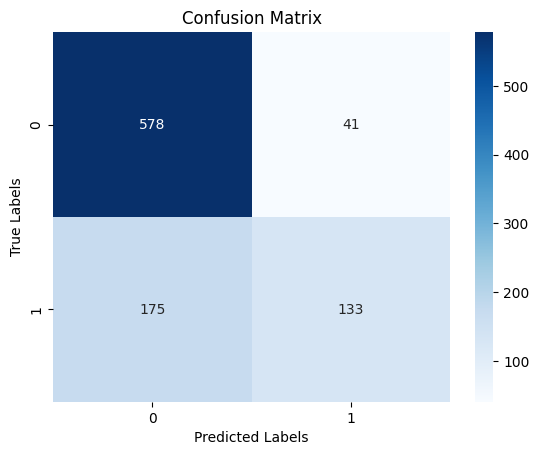

0.6972164087923255

In [56]:
MODEL_1_25_saving_DIRECTORY = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1/25"
print('Model 1 25% data directory: ', MODEL_1_25_saving_DIRECTORY)
train_method1(train_25_file, valid_file, MODEL_1_25_saving_DIRECTORY)

### training with 50% data

Model 1 50% data directory:  /content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1/50
Accuracy: 0.7691477885652643
Recall: 0.6819598011035815
Precision: 0.7746148852967718
F1 Score: 0.6967253714914694


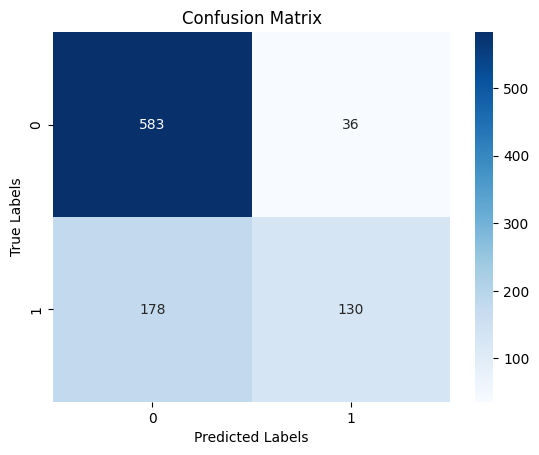

0.6967253714914694

In [57]:
MODEL_1_50_saving_DIRECTORY = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1/50"
print('Model 1 50% data directory: ', MODEL_1_50_saving_DIRECTORY)
train_method1(train_50_file, valid_file, MODEL_1_50_saving_DIRECTORY)

### training with 75% data

Model 1 75% data directory:  /content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1/75
Accuracy: 0.7669902912621359
Recall: 0.6868692696641
Precision: 0.7605989232839838
F1 Score: 0.7011926506930266


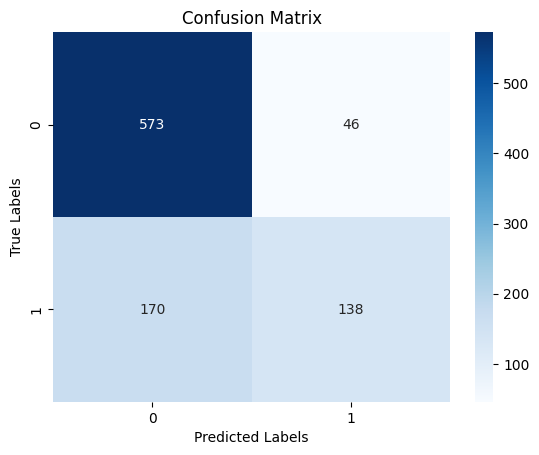

0.7011926506930266

In [58]:
MODEL_1_75_saving_DIRECTORY = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1/75"
print('Model 1 75% data directory: ', MODEL_1_75_saving_DIRECTORY)
train_method1(train_75_file, valid_file, MODEL_1_75_saving_DIRECTORY)

### training with 100% data

Model 1 100% data directory:  /content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1/100
Accuracy: 0.7637540453074434
Recall: 0.6828147619746974
Precision: 0.7559933016040896
F1 Score: 0.6966482525518018


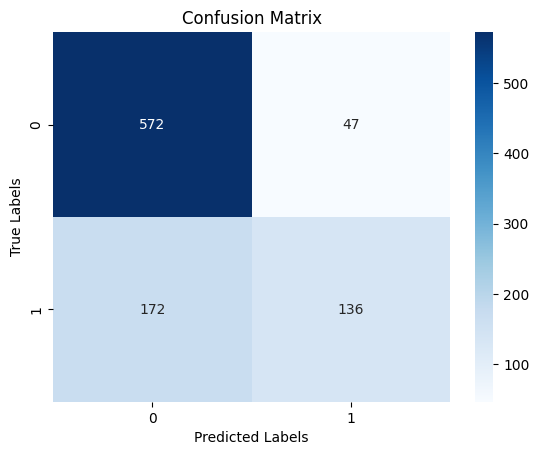

0.6966482525518018

In [59]:
MODEL_1_100_saving_DIRECTORY = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1/100"
print('Model 1 100% data directory: ', MODEL_1_100_saving_DIRECTORY)
train_method1(train_100_file, valid_file, MODEL_1_100_saving_DIRECTORY)

## Testing Method 1 Code
Your test code should be a stand alone code that must take `test_file`, `model_file` and `output_dir` as input. You could have other things as also input, but these three are must. You would load both files, and generate output based on inputs. Then you will `print` / `display`/ `plot` all performance metrics, and save the output file in the `output_dir`  

In [ ]:
model_1_25_output_test_file = os.path.join(MODEL_1_25_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 1 using 25% of train data: ',model_1_25_output_test_file)

In [43]:
test_file

'/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/test.csv'

In [73]:
import os
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
"""
def test_method1(test_file, model_file, output_dir):
    # Load the test data
    test_df = pd.read_csv(test_file)

    # Load the trained model
    with open(model_file, 'rb') as f:
        model = pickle.load(f)

    # Load the fitted vectorizer
    with open(os.path.join(os.path.dirname(model_file), 'vectorizer.pkl'), 'rb') as f:
        vectorizer = pickle.load(f)

    # Preprocess the text data in the test data
    test_df['tweet'] = test_df['tweet'].apply(preprocess_text)

    # Transform the preprocessed text data using the fitted vectorizer
    X_test = vectorizer.transform(test_df['tweet'])

    # Encode the label data in the test data
    le = LabelEncoder()
    y_test = le.fit_transform(test_df['label'])

    # Predict the labels of the test data using the loaded model
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Print the evaluation metrics
    print('Accuracy: {:.4f}'.format(accuracy))
    print('Precision: {:.4f}'.format(precision))
    print('Recall: {:.4f}'.format(recall))
    print('F1 Score: {:.4f}'.format(f1))

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


    # Save the output in a CSV format in the output directory
    output_file = os.path.join(output_dir, 'output_test.csv')
    output_df = pd.DataFrame({'tweet': test_df['tweet'], 'label': test_df['label'], 'predicted_label': y_pred})
    output_df.to_csv(output_file, index=False)

    return

    """

"\ndef test_method1(test_file, model_file, output_dir):\n    # Load the test data\n    test_df = pd.read_csv(test_file)\n\n    # Load the trained model\n    with open(model_file, 'rb') as f:\n        model = pickle.load(f)\n\n    # Load the fitted vectorizer\n    with open(os.path.join(os.path.dirname(model_file), 'vectorizer.pkl'), 'rb') as f:\n        vectorizer = pickle.load(f)\n\n    # Preprocess the text data in the test data\n    test_df['tweet'] = test_df['tweet'].apply(preprocess_text)\n\n    # Transform the preprocessed text data using the fitted vectorizer\n    X_test = vectorizer.transform(test_df['tweet'])\n\n    # Encode the label data in the test data\n    le = LabelEncoder()\n    y_test = le.fit_transform(test_df['label'])\n\n    # Predict the labels of the test data using the loaded model\n    y_pred = model.predict(X_test)\n\n    # Compute evaluation metrics\n    accuracy = accuracy_score(y_test, y_pred)\n    precision = precision_score(y_test, y_pred, average='macro')

In [76]:
import os
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def test_method1(test_file, model_file, output_dir):
    # Load the test data
    test_df = pd.read_csv(test_file)

    # Load the trained model
    with open(model_file, 'rb') as f:
        model = pickle.load(f)

    # Load the fitted vectorizer
    with open(os.path.join(os.path.dirname(model_file), 'vectorizer.pkl'), 'rb') as f:
        vectorizer = pickle.load(f)

    # Preprocess the text data in the test data
    test_df['tweet'] = test_df['tweet'].apply(preprocess_text)

    # Transform the preprocessed text data using the fitted vectorizer
    X_test = vectorizer.transform(test_df['tweet'])

    # Encode the label data in the test data
    le = LabelEncoder()
    y_test = le.fit_transform(test_df['label'])

    # Predict the labels of the test data using the loaded model
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Print the evaluation metrics
    print('Accuracy: {:.4f}'.format(accuracy))
    print('Precision: {:.4f}'.format(precision))
    print('Recall: {:.4f}'.format(recall))
    print('F1 Score: {:.4f}'.format(f1))

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Save the output in a CSV format in the output directory
    output_file = os.path.join(output_dir, 'output_test.csv')
    output_df = pd.DataFrame({'tweet': test_df['tweet'], 'label': test_df['label'], 'predicted_label': y_pred})
    output_df.to_csv(output_file, index=False)

    return accuracy, precision, recall, f1

def plot_performance(train_results, test_results, metric):
    # Set the figure size
    plt.figure(figsize=(8, 6))

    # Plot the training performance
    plt.plot(train_results['train_size'], train_results[metric], label='Training Set', marker='o')

    # Plot the testing performance
    plt.plot(test_results['train_size'], test_results[metric], label='Testing Set', marker='o')

    # Set the plot title, X and Y labels
    plt.title('Performance on Training and Testing Sets')
    plt.xlabel('Data Size')
    plt.ylabel(metric)

    # Set the X ticks
    xticks = np.arange(0, 1.1, 0.1)
    plt.xticks(xticks, ['{}%'.format(int(x*100)) for x in xticks])

    # Add annotations to the plot
    for i, (train_size, train_value) in enumerate(zip(train_results['train_size'], train_results[metric])):
        test_value = test_results[metric][i]
        plt.annotate(xy=(train_size, train_value), s='{:.4f}'.format(train_value), ha='right', va='bottom')
        plt.annotate(xy=(train_size, test_value), s='{:.4f}'.format(test_value), ha='left', va='top')

    # Use a curve graph instead of a line graph
    plt.plot(train_results['train_size'], train_results[metric], 'bo-', alpha=0.5)
    plt.plot(test_results['train_size'], test_results[metric], 'ro-', alpha=0.5)

    # Set the legend
    plt.legend()

    # Show the plot
    plt.show()
    return


Accuracy: 0.8035
Precision: 0.8080
Recall: 0.6747
F1 Score: 0.6988


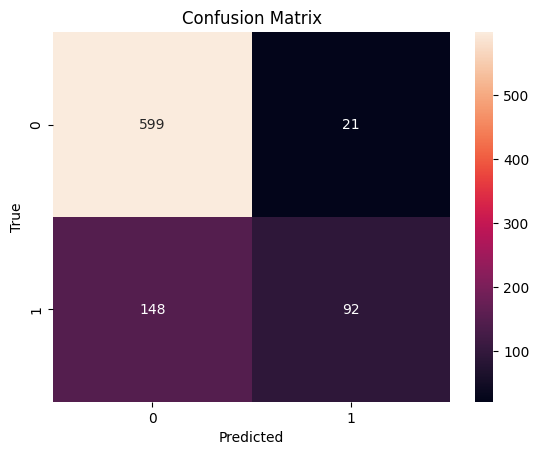

(0.8034883720930233, 0.8080167276776724, 0.674731182795699, 0.6988090378011858)

In [77]:
MODEL_1_DIRECTORY = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1/model.pkl"
output_dir = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1"
test_method1(test_file, MODEL_1_DIRECTORY, output_dir)

testing with 25% training dataset model


Accuracy: 0.8070
Precision: 0.8144
Recall: 0.6797
F1 Score: 0.7048


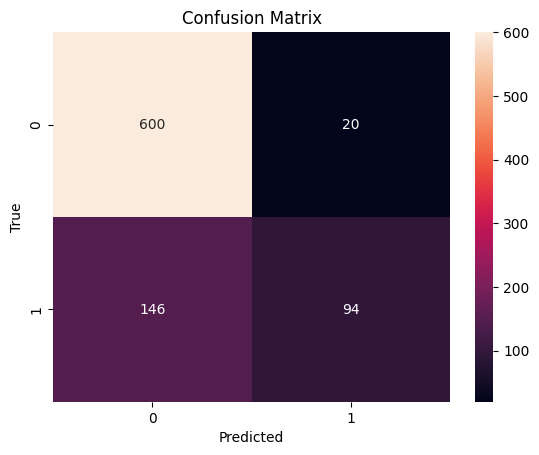

In [61]:
MODEL_1_25_DIRECTORY = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1/25/model.pkl"
output_dir_25 = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1/25"
test_method1(test_file, MODEL_1_25_DIRECTORY, output_dir_25)

testing with 50% training model

Accuracy: 0.8023
Precision: 0.8067
Recall: 0.6726
F1 Score: 0.6964


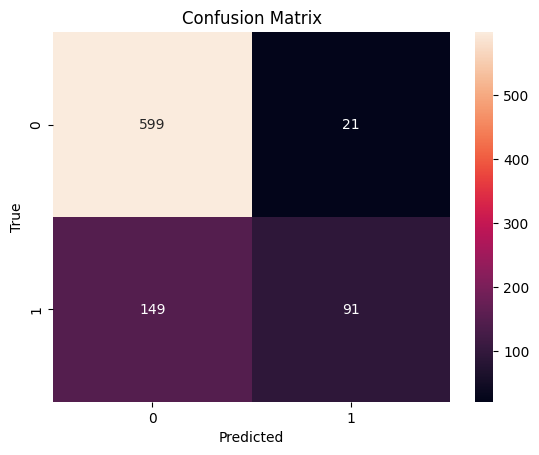

In [62]:
MODEL_1_50_DIRECTORY = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1/50/model.pkl"
output_dir_50 = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1/50"
test_method1(test_file, MODEL_1_50_DIRECTORY, output_dir_50)

testing with 75% training model

Accuracy: 0.8081
Precision: 0.8157
Recall: 0.6818
F1 Score: 0.7072


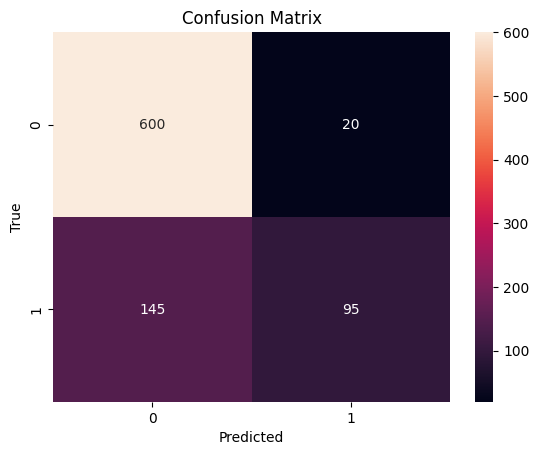

In [63]:
MODEL_1_75_DIRECTORY = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1/75/model.pkl"
output_dir_75 = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1/75"
test_method1(test_file, MODEL_1_75_DIRECTORY, output_dir_75)

testing with 100% training model

Accuracy: 0.8035
Precision: 0.8156
Recall: 0.6709
F1 Score: 0.6949


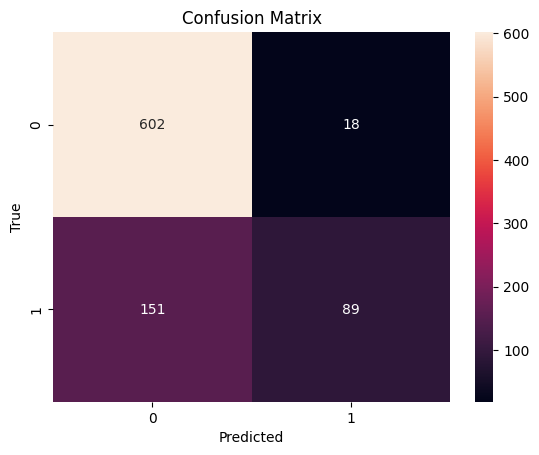

In [64]:
MODEL_1_100_DIRECTORY = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1/100/model.pkl"
output_dir_100 = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1/100"
test_method1(test_file, MODEL_1_100_DIRECTORY, output_dir_100)

## Method 1 End

#Method 2 Start

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

def train_method2(train_file, val_file, model_dir):
    # Load the train data
    train_df = pd.read_csv(train_file)

    # Preprocess the text data
    train_df['tweet'] = train_df['tweet'].apply(preprocess_text)

    # Create a TfidfVectorizer object
    vectorizer = TfidfVectorizer()

    # Fit and transform the vectorizer on the preprocessed text data
    X_train = vectorizer.fit_transform(train_df['tweet'])

    # Encode the label data
    le = LabelEncoder()
    y_train = le.fit_transform(train_df['label'])

    # Create a Gradient Boosting classifier object
    gbc = GradientBoostingClassifier()

    # Train the Gradient Boosting classifier model on the training data
    gbc.fit(X_train, y_train)

    # Load the validation data
    valid_df = pd.read_csv(val_file)

    # Preprocess the text data in the validation data
    valid_df['tweet'] = valid_df['tweet'].apply(preprocess_text)

    # Transform the preprocessed text data using the fitted vectorizer
    X_valid = vectorizer.transform(valid_df['tweet'])

    # Encode the label data in the validation data
    y_valid = le.transform(valid_df['label'])

    # Predict the labels of the validation data using the trained model
    y_pred = gbc.predict(X_valid)

    # Compute the performance of the model using the compute_performance function
    f1 = compute_performance(y_valid, y_pred)

    # Save the fitted vectorizer and trained Gradient Boosting classifier model in the model directory
    with open(os.path.join(model_dir, 'vectorizer.pkl'), 'wb') as f:
        pickle.dump(vectorizer, f)

    with open(os.path.join(model_dir, 'model.pkl'), 'wb') as f:
        pickle.dump(gbc, f)

    return f1

In [91]:
MODEL_2_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '2') # Model 1 directory
print('Model 2 directory: ', MODEL_2_DIRECTORY)

Model 2 directory:  /content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/2


Accuracy: 0.7475728155339806
Recall: 0.6380735581058683
Precision: 0.7757537030441433
F1 Score: 0.6434193395668126


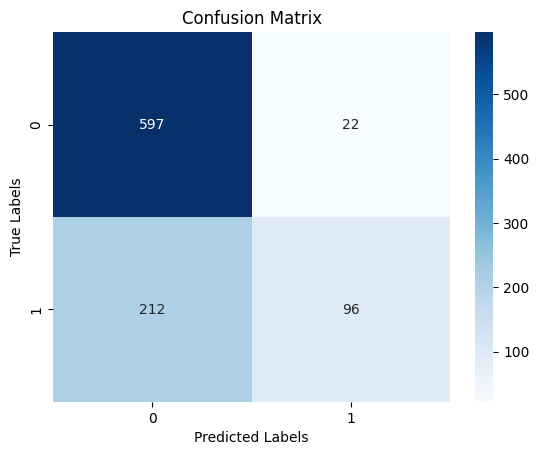

0.6434193395668126

In [84]:
train_method2(train_file, valid_file, MODEL_2_DIRECTORY)

###Trying to improve the results of Method 2

In [86]:
import os
import pandas as pd
import pickle
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

def train_method2_gsc(train_file, val_file, model_dir):
    # Load the train data
    train_df = pd.read_csv(train_file)

    # Preprocess the text data
    train_df['tweet'] = train_df['tweet'].apply(preprocess_text)

    # Create a TfidfVectorizer object
    vectorizer = TfidfVectorizer()

    # Fit and transform the vectorizer on the preprocessed text data
    X_train = vectorizer.fit_transform(train_df['tweet'])

    # Encode the label data
    le = LabelEncoder()
    y_train = le.fit_transform(train_df['label'])

    # Create a XGBoost classifier object
    xgb = XGBClassifier(use_label_encoder=False)

    # Set the hyperparameters to tune
    param_grid = {
        'max_depth': [3, 4, 5, 6],
        'n_estimators': [50, 100, 150, 200],
        'learning_rate': [0.01, 0.1, 0.5]
    }

    # Create a GridSearchCV object to find the best hyperparameters
    grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='f1_macro')
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters found
    print('Best hyperparameters:', grid_search.best_params_)

    # Train the XGBoost classifier model on the training data using the best hyperparameters
    xgb = XGBClassifier(**grid_search.best_params_, use_label_encoder=False)
    xgb.fit(X_train, y_train)

    # Load the validation data
    valid_df = pd.read_csv(val_file)

    # Preprocess the text data in the validation data
    valid_df['tweet'] = valid_df['tweet'].apply(preprocess_text)

    # Transform the preprocessed text data using the fitted vectorizer
    X_valid = vectorizer.transform(valid_df['tweet'])

    # Encode the label data in the validation data
    y_valid = le.transform(valid_df['label'])

    # Predict the labels of the validation data using the trained model
    y_pred = xgb.predict(X_valid)

    # Compute the performance of the model using the compute_performance function
    f1 = compute_performance(y_valid, y_pred)

    # Save the fitted vectorizer and trained XGBoost classifier model in the model directory
    with open(os.path.join(model_dir, 'vectorizer.pkl'), 'wb') as f:
        pickle.dump(vectorizer, f)

    with open(os.path.join(model_dir, 'model.pkl'), 'wb') as f:
        pickle.dump(xgb, f)

    return f1

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

Best hyperparameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.761596548004315
Recall: 0.6934335858003063
Precision: 0.7409099817089104
F1 Score: 0.7056986437546777


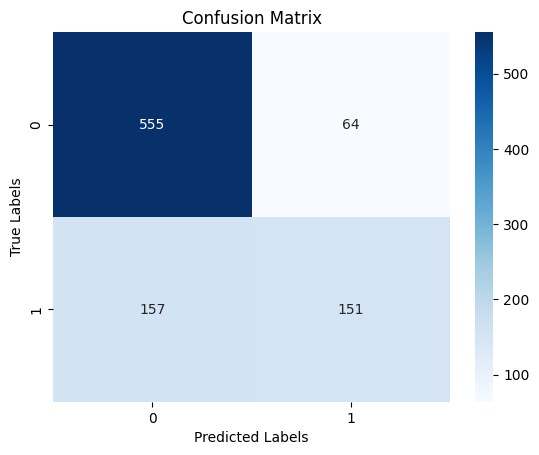

0.7056986437546777

In [87]:
train_method2_gsc(train_file, valid_file, MODEL_2_DIRECTORY)

### training 4 splitted sub sets in Method 2

In [88]:
train_25_file

'/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1/25/train_25.csv'

Model 2 25% data directory:  /content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/2/25


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

Best hyperparameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 50}
Accuracy: 0.6882416396979504
Recall: 0.5903845750372406
Precision: 0.6370555953233119
F1 Score: 0.5898688482929764


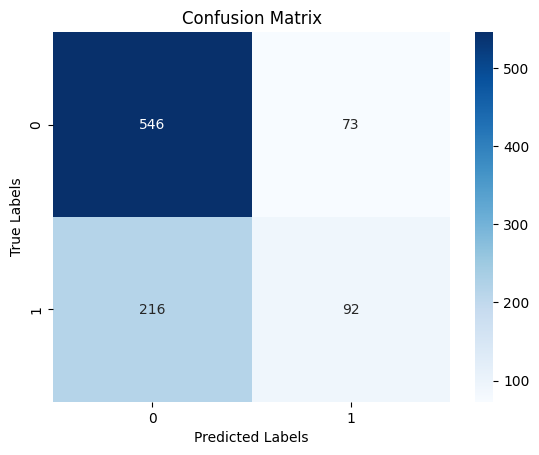

0.5898688482929764

In [92]:
MODEL_2_25_saving_DIRECTORY = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/2/25"
print('Model 2 25% data directory: ', MODEL_2_25_saving_DIRECTORY)
train_method2(train_25_file, valid_file, MODEL_2_25_saving_DIRECTORY)

Model 2 50% data directory:  /content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/2/50


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Accuracy: 0.7130528586839266
Recall: 0.610594171579632
Precision: 0.6849139669899847
F1 Score: 0.6120484581497797


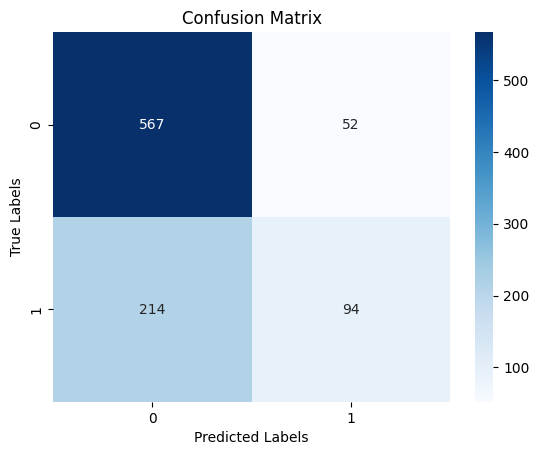

0.6120484581497797

In [93]:
MODEL_2_50_saving_DIRECTORY = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/2/50"
print('Model 2 50% data directory: ', MODEL_2_50_saving_DIRECTORY)
train_method2(train_50_file, valid_file, MODEL_2_50_saving_DIRECTORY)

Model 2 75% data directory:  /content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/2/75


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

Best hyperparameters: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 50}
Accuracy: 0.6990291262135923
Recall: 0.598462119463735
Precision: 0.6568778204913923
F1 Score: 0.5984165407673209


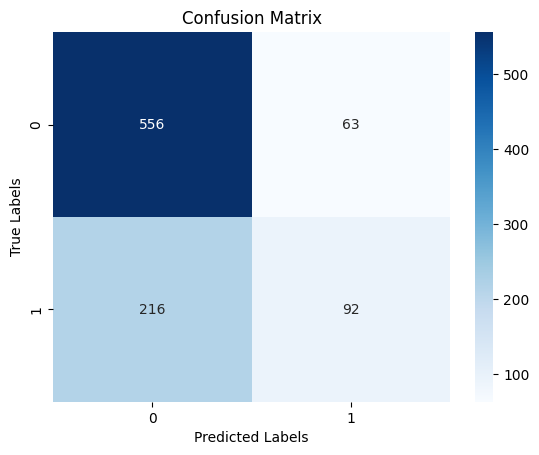

0.5984165407673209

In [94]:
MODEL_2_75_saving_DIRECTORY = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/2/75"
print('Model 2 75% data directory: ', MODEL_2_75_saving_DIRECTORY)
train_method2(train_75_file, valid_file, MODEL_2_75_saving_DIRECTORY)

Model 2 100% data directory:  /content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/2/100


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

Best hyperparameters: {'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 150}
Accuracy: 0.7475728155339806
Recall: 0.6764078006000462
Precision: 0.7218795355587808
F1 Score: 0.6872938530734634


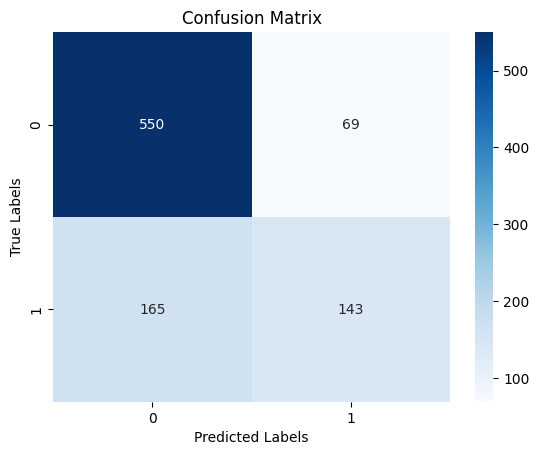

0.6872938530734634

In [95]:
MODEL_2_100_saving_DIRECTORY = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/2/100"
print('Model 2 100% data directory: ', MODEL_2_100_saving_DIRECTORY)
train_method2(train_100_file, valid_file, MODEL_2_100_saving_DIRECTORY)

### testing with method 2 model

In [96]:
def test_method2(test_file, model_file, output_dir):
  # Load the test data
  test_df = pd.read_csv(test_file)

  # Load the trained model
  with open(model_file, 'rb') as f:
    model = pickle.load(f)

# Load the fitted vectorizer
  with open(os.path.join(os.path.dirname(model_file), 'vectorizer.pkl'), 'rb') as f:
    vectorizer = pickle.load(f)

# Preprocess the text data in the test data
  test_df['tweet'] = test_df['tweet'].apply(preprocess_text)

# Transform the preprocessed text data using the fitted vectorizer
  X_test = vectorizer.transform(test_df['tweet'])

# Encode the label data in the test data
  le = LabelEncoder()
  y_test = le.fit_transform(test_df['label'])

# Predict the labels of the test data using the loaded model
  y_pred = model.predict(X_test)

# Compute evaluation metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='macro')
  recall = recall_score(y_test, y_pred, average='macro')
  f1 = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
  print('Accuracy: {:.4f}'.format(accuracy))
  print('Precision: {:.4f}'.format(precision))
  print('Recall: {:.4f}'.format(recall))
  print('F1 Score: {:.4f}'.format(f1))

# Plot the confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

# Plot the ROC curve
  y_score = model.predict_proba(X_test)[:, 1]
  fpr, tpr, _ = roc_curve(y_test, y_score)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = {:.2f})'.format(roc_auc))
  plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic Curve')
  plt.legend(loc="lower right")
  plt.show()

# Save the output in a CSV format in the output directory
  output_file = os.path.join(output_dir, 'output_test.csv')
  output_df = pd.DataFrame({'tweet': test_df['tweet'], 'label': test_df['label'], 'predicted_label': y_pred})
  output_df.to_csv(output_file, index=False)

  return


Accuracy: 0.8035
Precision: 0.8080
Recall: 0.6747
F1 Score: 0.6988


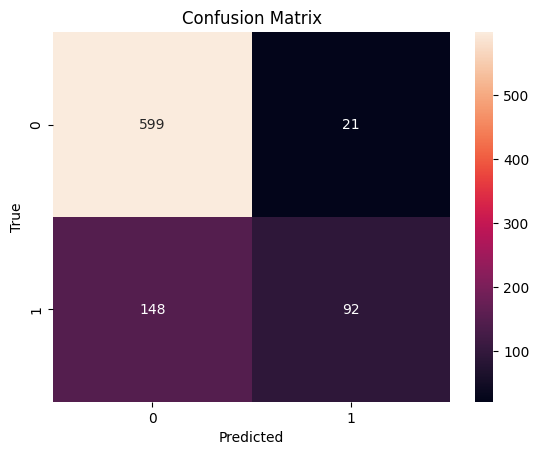

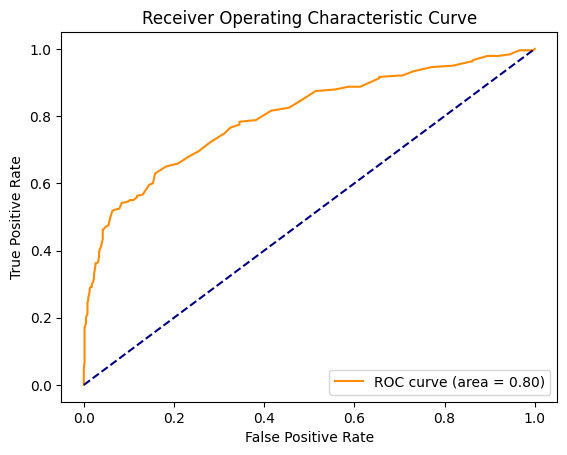

In [97]:
MODEL_2_DIRECTORY = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/1/model.pkl"
output_dir = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/2"
test_method2(test_file, MODEL_2_DIRECTORY, output_dir)

### Testing_method2 with 4 splitted sub sets of original data

Accuracy: 0.7488
Precision: 0.6856
Recall: 0.6138
F1 Score: 0.6237


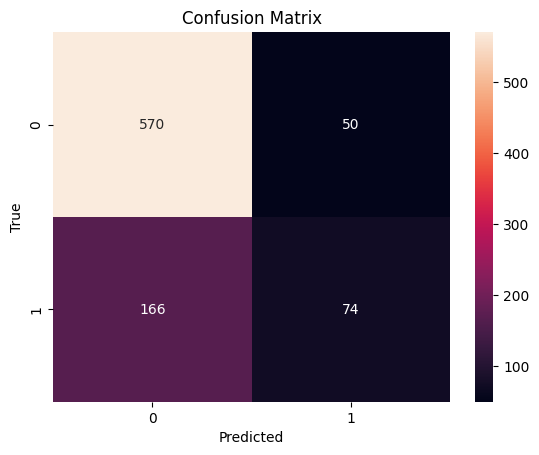

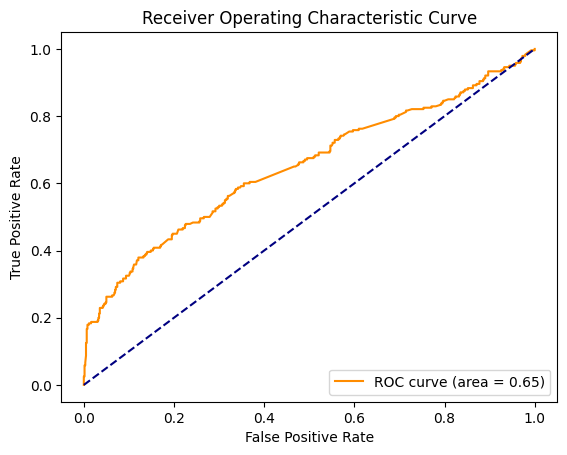

In [98]:
MODEL_2_25_DIRECTORY = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/2/25/model.pkl"
output_dir_25 = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/2/25"
test_method2(test_file, MODEL_2_25_DIRECTORY, output_dir_25)

Accuracy: 0.7581
Precision: 0.7280
Recall: 0.5999
F1 Score: 0.6045


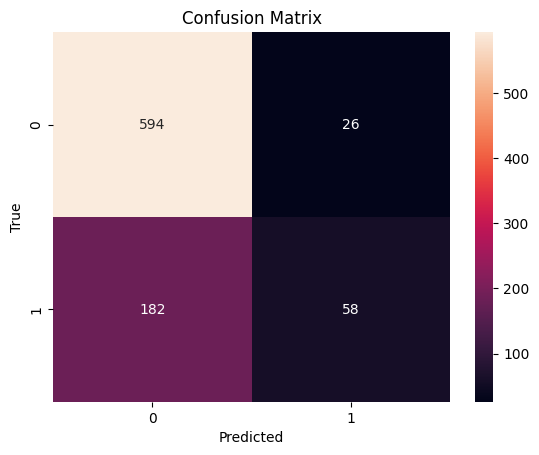

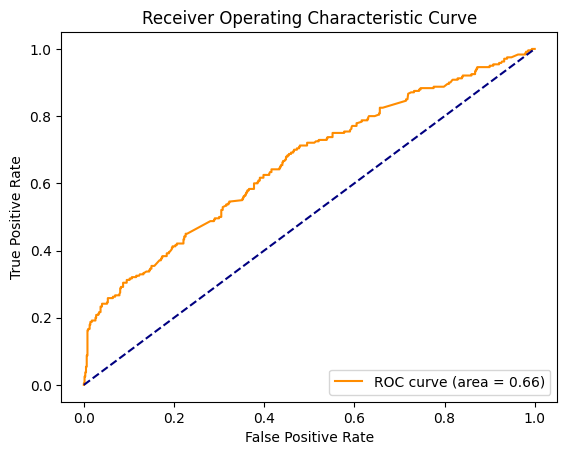

In [99]:
MODEL_2_50_DIRECTORY = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/2/50/model.pkl"
output_dir_50 = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/2/50"
test_method2(test_file, MODEL_2_50_DIRECTORY, output_dir_50)

Accuracy: 0.7267
Precision: 0.6398
Recall: 0.5513
F1 Score: 0.5365


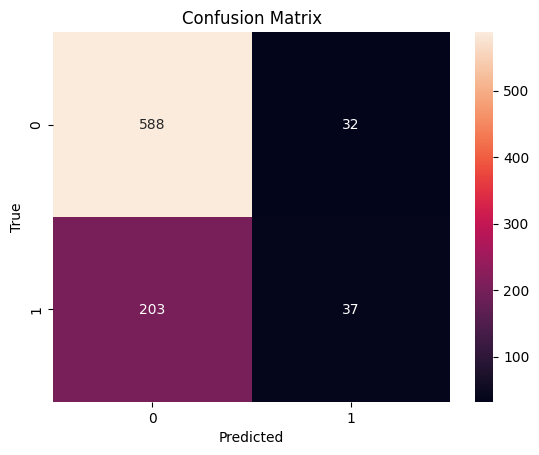

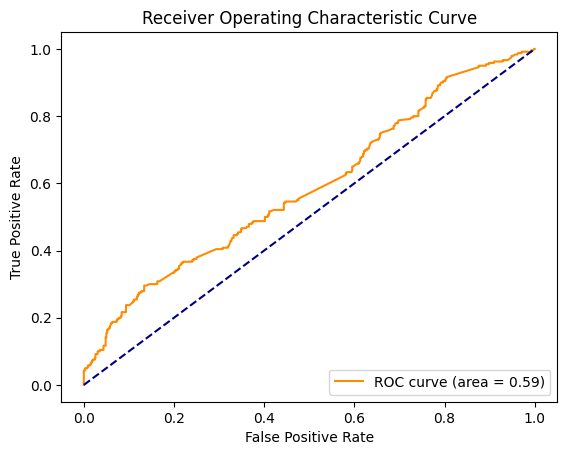

In [100]:
MODEL_2_75_DIRECTORY = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/2/75/model.pkl"
output_dir_75 = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/2/75"
test_method2(test_file, MODEL_2_75_DIRECTORY, output_dir_75)

Accuracy: 0.7988
Precision: 0.7608
Recall: 0.7047
F1 Score: 0.7225


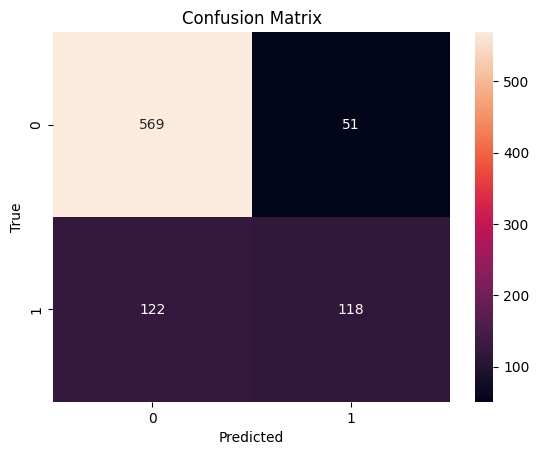

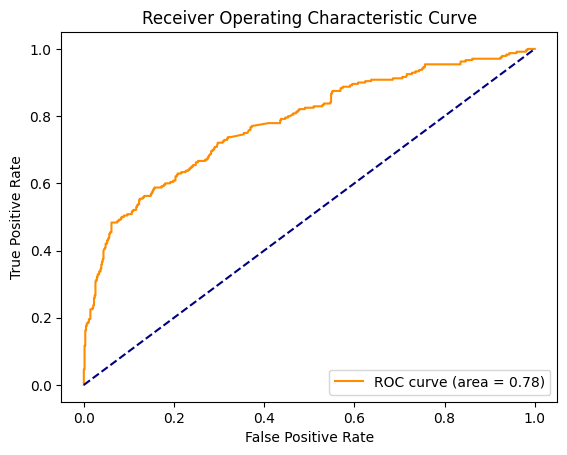

In [101]:
MODEL_2_100_DIRECTORY = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/2/100/model.pkl"
output_dir_100 = "/content/gdrive/MyDrive/CE807_7_SP/assignment2/2201277/models/2/100"
test_method2(test_file, MODEL_2_100_DIRECTORY, output_dir_100)

### Method 2 End